# Limpeza dos dados
## Furto de Veiculos

Com os dados obtidos  e já compilados, o próximo passo é realizar a limpeza do dataset
Isso consiste em:
 - Separar a cidade de São Bernardo do Campo
 - Verificar valores nulos
 - Campos duplicados
 - Remover informações que não serão úteis
 - Acertar ou remover informações erradas

### Importar as bibliotecas

As bibliotecas que serão utilizadas são:
 - `Pandas` - Manipulação do dataset
 - `Matplotlib` - Visualização dos dados
 - `Seaborn`- Visualização dos dados
 - `Numpy` - habilita propriedades matemáticas

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregar o dataset de roubo de veiculos

Carregar o dataset, verificar suas dimensões e ter as primeiras impressões

In [2]:
path = 'data_cleaned/furto_veiculo2010_2020.csv'

df = pd.read_csv(path, low_memory=False) # Utilizado o low_memory = False devido ao tamnho do arquivo

In [3]:
print('{} Linhas\n{} Colunas'.format(df.shape[0],df.shape[1]))
df.head() # Mostra as 5 primeiras linhas do dataset

1536341 Linhas
54 Colunas


,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2009,4329,4329/2009,31/12/2009 23:58:08,01/01/2010 00:01:48,31/12/2009,23:00,A NOITE,31/12/2009,31/12/2009 23:58:08,...,CIO9192,SP,SUZANO,Branco,VW/GOL PLUS MI,1997.0,1997.0,AUTOMOVEL,NaN,NaN
1,2009,6595,6595/2009,31/12/2009 23:55:54,01/01/2010 00:02:38,31/12/2009,NaN,A TARDE,31/12/2009,31/12/2009 23:55:54,...,CQK4983,SP,CABRALIA PAULISTA,Branco,VW/KOMBI,1974.0,1974.0,AUTOMOVEL,NaN,NaN
2,2010,1,1/2010,01/01/2010 00:05:13,01/01/2010 00:12:24,31/12/2009,19:40,A NOITE,31/12/2009,01/01/2010 00:05:13,...,DDW1129,SP,SAO BERNARDO DO CAMP,Azul,FIAT/PALIO YOUNG,2000.0,2001.0,AUTOMOVEL,NaN,NaN
3,2010,1,1/2010,01/01/2010 00:48:15,01/01/2010 00:51:39,31/12/2009,23:50,A NOITE,01/01/2010,01/01/2010 00:48:15,...,KZW5136,SP,RIO CLARO,Preta,HONDA/CG 125 FAN,2006.0,2006.0,MOTOCICLO,NaN,NaN
4,2010,1,1/2010,01/01/2010 00:58:51,01/01/2010 01:02:29,31/12/2009,22:30,A NOITE,01/01/2010,01/01/2010 00:58:51,...,CLS4059,SP,SAO PAULO,Branco,IMP/FIAT UNO MILLE SX,1997.0,1998.0,AUTOMOVEL,NaN,NaN


### Extrair os dados da cidade de Sâo Bernardo do Campo

Como o foco da análise será somente a cidade de São Bernardo do Campo, deve-se entender como foi registrado o nome das cidades e achar a cidade escolhida.

In [4]:
df.CIDADE.unique()

array(['S.PAULO', 'JAU', 'S.BERNARDO DO CAMPO', ..., 'LUCIANOPOLIS',
       'TURMALINA', 'PASSA QUATRO'], dtype=object)

Criar um novo dataframe apenas com a cidade de São Bernardo do Campo e verificar suas dimensões

In [5]:
dfsbc = df.loc[df.CIDADE == 'S.BERNARDO DO CAMPO']
print('{} Linhas\n{} Colunas'.format(dfsbc.shape[0],dfsbc.shape[1]))

35656 Linhas
54 Colunas


### Verificar dados nulos e ausentes

É possivel ver que pelo menos 19 colunas possuem mais de 90% de dados ausentes, a grande maioria relacionado a dados pessoais.

Essas as quais podem ser diretamente removidas do dataset.

Abaixo a lista ordenada em % dos primeiros 35 mais ausentes

In [6]:
nulos = dfsbc.isnull().sum().sort_values(ascending=False)*100 / dfsbc.shape[0]
nulos.head(35)

MARCA_CELULAR               100.000000
QUANT_CELULAR               100.000000
PARENTESCO                  100.000000
RELACIONAMENTO              100.000000
NACIONALIDADE               100.000000
ESTADOCIVIL                  99.966345
NATURALIDADE                 99.966345
SEXO                         99.966345
DATANASCIMENTO               99.966345
IDADE                        99.966345
GRAUINSTRUCAO                99.966345
PROFISSAO                    99.966345
TIPOPESSOA                   99.966345
CORCUTIS                     99.966345
NATUREZAVINCULADA            99.966345
TIPOVINCULO                  99.966345
VITIMAFATAL                  99.966345
DESDOBRAMENTO                98.440655
NUMERO_BOLETIM_PRINCIPAL     97.568432
EXAME                        88.655486
HORAOCORRENCIA               36.350123
LATITUDE                     18.714943
LONGITUDE                    18.714943
DESCR_MARCA_VEICULO          16.976105
DESCR_TIPO_VEICULO           16.280570
CIDADE_VEICULO           

Uma outra maneira de ter uma visão geral é utilizando a função `Heatmap` da biblioteca `Seaborn`

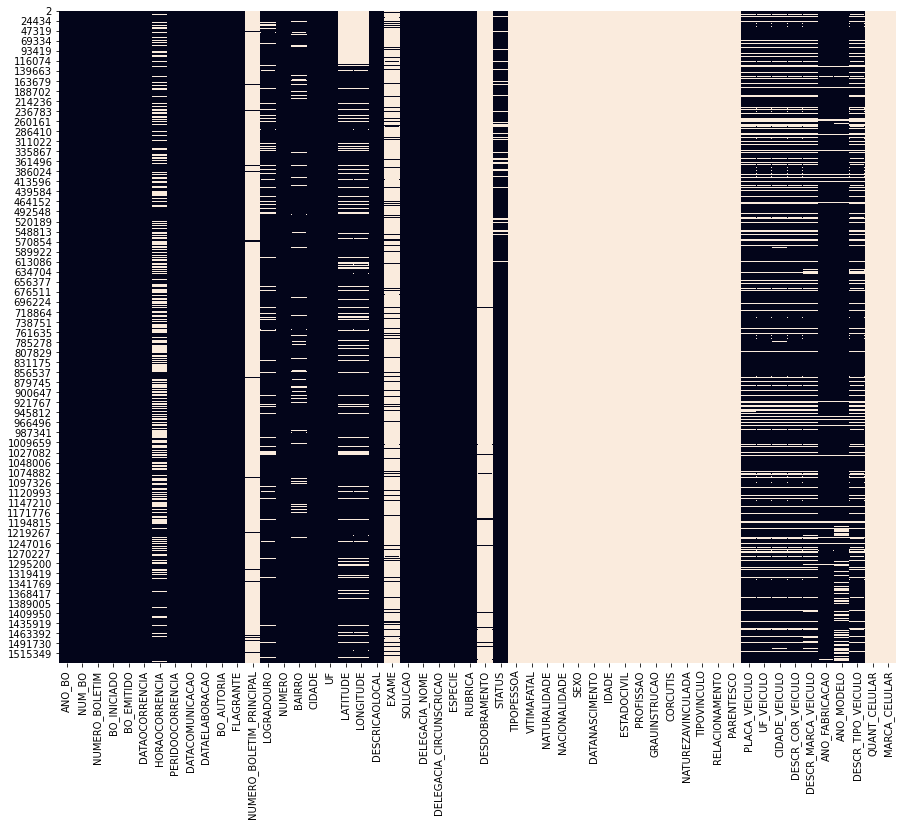

In [7]:
fig = plt.figure(figsize = (15,12));
sns.heatmap(dfsbc.isnull(), cbar = False);

### Remover colunas e dados indesejados

Primeiramente avaliar entre as colunas que tem mais que 70% dos dados ausentes o que é possível eliminar e criar uma lista com esses campos

In [8]:
nulos.index[nulos > 0.7]

Index(['MARCA_CELULAR', 'QUANT_CELULAR', 'PARENTESCO', 'RELACIONAMENTO',
       'NACIONALIDADE', 'ESTADOCIVIL', 'NATURALIDADE', 'SEXO',
       'DATANASCIMENTO', 'IDADE', 'GRAUINSTRUCAO', 'PROFISSAO', 'TIPOPESSOA',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'VITIMAFATAL',
       'DESDOBRAMENTO', 'NUMERO_BOLETIM_PRINCIPAL', 'EXAME', 'HORAOCORRENCIA',
       'LATITUDE', 'LONGITUDE', 'DESCR_MARCA_VEICULO', 'DESCR_TIPO_VEICULO',
       'CIDADE_VEICULO', 'PLACA_VEICULO', 'UF_VEICULO', 'DESCR_COR_VEICULO',
       'ANO_MODELO', 'LOGRADOURO', 'BAIRRO', 'STATUS', 'ANO_FABRICACAO'],
      dtype='object')

Os campos pessoais podem ser diretamente eliminados, assim como marca e quantidade de celular para os demais campos será analisado a real necessidade

In [9]:
eliminar = ['MARCA_CELULAR', 'PARENTESCO', 'QUANT_CELULAR', 'RELACIONAMENTO', 'NACIONALIDADE', 'PROFISSAO',
       'GRAUINSTRUCAO', 'NATURALIDADE', 'DATANASCIMENTO', 'ESTADOCIVIL',
       'IDADE', 'NATUREZAVINCULADA', 'TIPOPESSOA', 'SEXO', 'CORCUTIS',
       'TIPOVINCULO']

In [10]:
dfsbc.drop(eliminar, axis=1, inplace=True)

c:\users\caior\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
dfsbc.shape

(35656, 38)

### Analisando demais colunas

Usar comando abaixo para ajustar configurações de visualização do pandas para explorar os dados das colunas

In [12]:
pd.set_option('display.max_columns', 60) # Define limite de 60 colunas na visualização
#pd.set_option('display.max_seq_items', 30) # Define limite de linhas na visualização

Selecionar somente os campos onde há vitima fatal e contar.

De acordo com o site da SSP-SP, a referência de quantidade de Boletins de Ocorrência deve ser pelo Número do Boletim (NUMERO_BOLETIM).



In [13]:
vitimafatal = dfsbc[dfsbc['VITIMAFATAL'].isnull()==False]
total_vf = len(vitimafatal['NUMERO_BOLETIM'].unique())
print(total_vf, 'vitimas fatais de 2010 à 2020')

1 vitimas fatais de 2010 à 2020


Neste caso, houve 1 vitima fatal entre 2010 e 2020,

Por esta razão os dados serão mantidos, apenas a coluna `'VITIMAFATAL'` será removida.

Os campos `'DESDOBRAMENTO'`, `'EXAME'`, possuem informações que não são relevantes para a ánalise, porém os dados devem ser mantidos, removendo apenas as colunas

In [14]:
dfsbc.EXAME.unique()

array([nan, 'IC', 'IC-IML', 'IML'], dtype=object)

In [15]:
dfsbc.DESDOBRAMENTO.unique()

array([nan, '§4o. Se o crime é cometido:',
       'caput. Subtrair coisa móvel alheia, mediante grave ameaça ou violência a pessoa',
       'Caput Corromper ou facilitar a corrupção de menor de 18 (dezoito) anos',
       'Lesão corporal decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)',
       'Nas mesmas penas incorrem quem (Par. único)',
       'Meio empregado para destruição ou rompimento de obstáculo à subtração da coisa',
       'Fazer uso de documento PÚBLICO ideologicamente falso (art. 299)',
       '§ 4° I - Com destruição ou rompimento de obstáculo à subtração da coisa;',
       'Contra autoridade ou agente descrito nos arts. 142 e 144 da Constituição Federal',
       'V - para assegurar a execução/ocultação/impunidade/vantagem de outro crime',
       '§ 4º IV - Mediante concurso de duas ou mais pessoas.',
       'caput. Adulterar/remarcar núm de chassi ou sinal identificador de veículo',
       '§ 4º II - Com abuso de confiança, ou mediante fraude, escalada ou de

In [16]:
eliminar = ['VITIMAFATAL', 'DESDOBRAMENTO', 'EXAME']

dfsbc.drop(eliminar, axis=1, inplace=True)

c:\users\caior\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
dfsbc.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,STATUS,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
2,2010,1,1/2010,01/01/2010 00:05:13,01/01/2010 00:12:24,31/12/2009,19:40,A NOITE,31/12/2009,01/01/2010 00:05:13,Desconhecida,Não,NaN,R MARIA GASTALDO CATELAN,60,PQ. SELETA,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,ENCAMINHAMENTO DP ÁREA DO FATO,03º D.P. S.BERNARDO DO CAMPO,06º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,DDW1129,SP,SAO BERNARDO DO CAMP,Azul,FIAT/PALIO YOUNG,2000.0,2001.0,AUTOMOVEL
19,2010,2,2/2010,01/01/2010 01:44:26,01/01/2010 01:51:59,01/01/2010,00:10,DE MADRUGADA,01/01/2010,01/01/2010 01:44:26,Desconhecida,Não,NaN,R ARMANDO BACKX,644,JERUSALEM,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.BERNARDO DO CAMPO,03º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,DBQ6906,SP,SAO BERNARDO DO CAMP,Cinza,FIAT/UNO MILLE SMART,2000.0,2001.0,AUTOMOVEL
30,2010,4,4/2010,01/01/2010 02:58:28,01/01/2010 03:02:46,01/01/2010,NaN,DE MADRUGADA,01/01/2010,01/01/2010 02:58:28,Desconhecida,Não,NaN,R ROLANDO GAMBINI,341,LAVINIA,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.BERNARDO DO CAMPO,03º D.P. S.BERNARDO DO CAMPO,Título II - Patrimônio (arts. 155 a 183),Furto (art. 155) - VEICULO,Consumado,BGS2433,SP,SAO BERNARDO DO CAMP,Verde,FIAT/UNO MILLE,1992.0,1992.0,AUTOMOVEL
36,2010,8,8/2010,01/01/2010 04:31:40,01/01/2010 04:34:55,01/01/2010,02:59,DE MADRUGADA,01/01/2010,01/01/2010 04:31:40,Desconhecida,Não,NaN,AV MARIA SERVIDEI DEMARCHI,398,DEMARCHI,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.BERNARDO DO CAMPO,01º D.P. S.B.C-DR OMAR CASSIM,Localização e/ou Devolução,Localização/Apreensão e Entrega de veículo,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
37,2010,8,8/2010,01/01/2010 04:31:40,01/01/2010 04:34:55,01/01/2010,02:59,DE MADRUGADA,01/01/2010,01/01/2010 04:31:40,Desconhecida,Não,NaN,AV MARIA SERVIDEI DEMARCHI,398,DEMARCHI,S.BERNARDO DO CAMPO,SP,NaN,NaN,Via pública,APRECIAÇÃO DO DELEGADO TITULAR,03º D.P. S.BERNARDO DO CAMPO,01º D.P. S.B.C-DR OMAR CASSIM,Localização e/ou Devolução,Localização/Apreensão e Entrega de veículo,NaN,BHE5448,SP,SAO BERNARDO DO CAMP,Cinza,FIAT/UNO MILLE BRIO,1991.0,1991.0,AUTOMOVEL


In [18]:
dfsbc.shape

(35656, 35)

Plotar novamente o gráfico *heatmap* para verificar como ficou o dataset após a eliminação dos dados anteriores

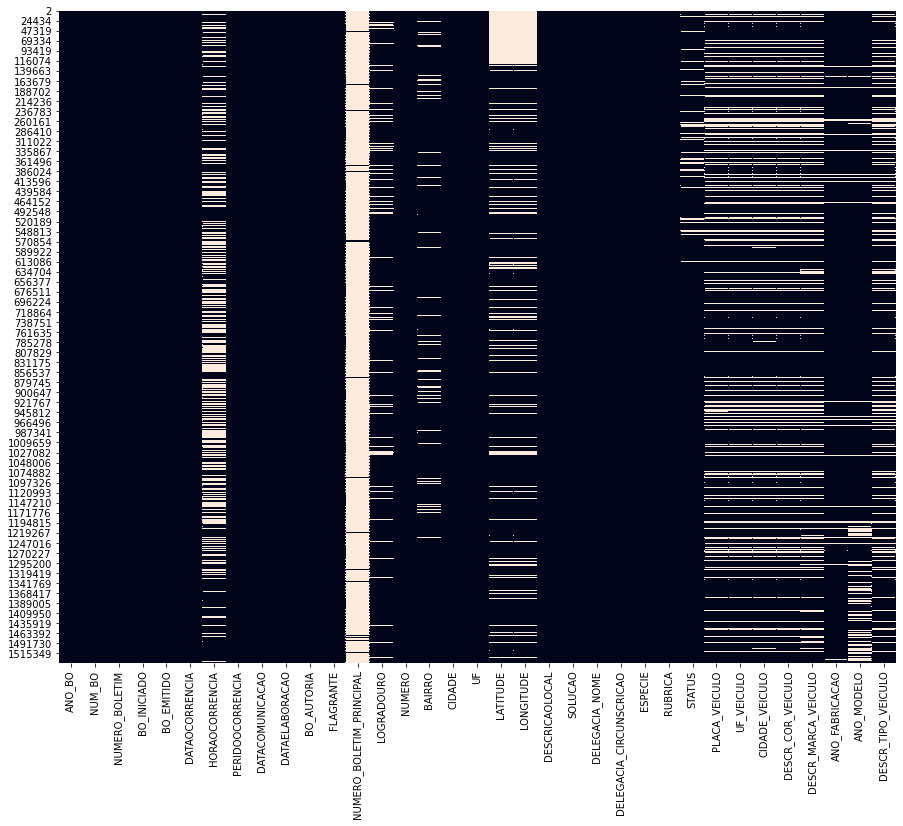

In [19]:
fig = plt.figure(figsize = (15,12));
sns.heatmap(dfsbc.isnull(), cbar = False);

## Verificando Outliers

Ao executar o comando `.describe()`, é possível visualizar que na coluna `ANO_FABRICACAO` tem algum valor não correto, pois é maior do que a data atual

In [20]:
display(dfsbc.describe())

,ANO_BO,NUM_BO,ANO_FABRICACAO,ANO_MODELO
count,35656.000000,3.565600e+04,34676.000000,32310.000000
mean,2014.847852,1.811347e+05,1733.521485,1713.040235
std,2.928281,4.081576e+05,687.408791,707.146987
min,2010.000000,1.000000e+00,0.000000,0.000000
25%,2012.000000,2.000000e+03,1993.000000,1993.000000
50%,2015.000000,5.035000e+03,2007.000000,2006.000000
75%,2017.000000,1.212200e+04,2011.000000,2011.000000
max,2020.000000,3.000022e+06,8989.000000,2021.000000


Abaixo um *boxplot* e um gráfico de densidade para melhor visualizar estes *outliers*

No caso um comparativo do `ANO_FABRICAÇÃO` com `ANO_MODELO` onde os 2 apresentam valores nulos (representados como zeros)

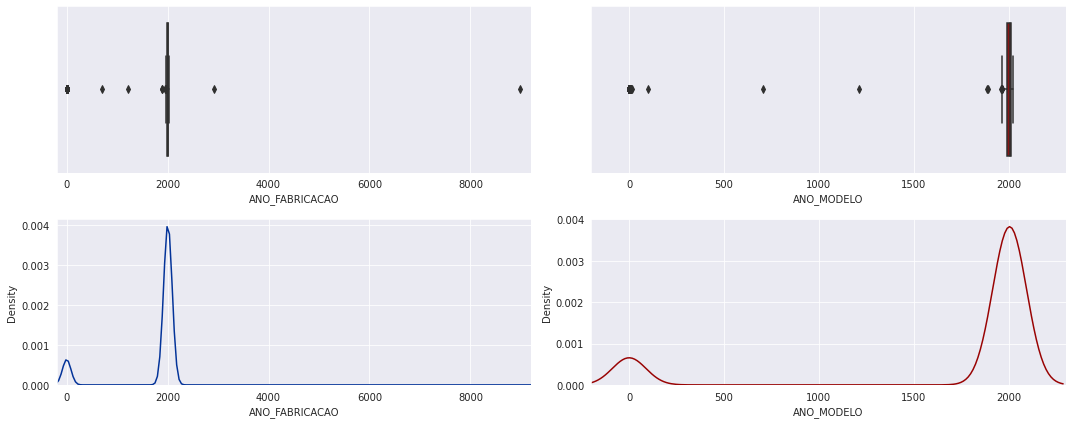

In [21]:
f = plt.figure(figsize=(15, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    ax.set(xlim=(-200, 9200))
    sns.boxplot(x=dfsbc['ANO_FABRICACAO'], color='#033399')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    ax.set(xlim=(-200, 2300))
    sns.boxplot(x=dfsbc['ANO_MODELO'], color='#990303')


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    ax.set(xlim=(-200, 9200))
    sns.kdeplot(x=dfsbc['ANO_FABRICACAO'], ax=ax, color='#033399')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    ax.set(xlim=(-200, 2300))
    sns.kdeplot(x=dfsbc['ANO_MODELO'], ax=ax, color='#990303')

f.tight_layout()

Para visualizar e entender quais são e quantos são os tipos de erros, serão selecionados todas as entradas e ordenadas do maior para o menor

Apesar da base de dados ser até o ano de 2020, é comum as montadoras lançarem carros modelo 2021 ainda no ano de 2020

In [22]:
dfsbc['ANO_FABRICACAO'].sort_values(ascending=False).unique()[:-1].astype(int)

array([8989, 2912, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
       1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979,
       1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968,
       1967, 1966, 1965, 1964, 1957, 1889, 1884, 1213,  708,    7,    0])

In [23]:
dfsbc['ANO_MODELO'].sort_values(ascending=False).unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977.,
       1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968.,
       1967., 1966., 1965., 1964., 1957., 1889., 1884., 1213.,  708.,
        100.,   16.,   10.,    8.,    0.,   nan])

Será criada uma restrição de "ANO_FABRICACAO" onde as entradas que estiverem nas condições descritas abaixo serão consideradas como "0"

 - **Condição 1** - "ANO_FABRICACAO" > 2020
 - **Condição 2** - "ANO_FABRICACAO" < 1900 e "ANO_FABRICACAO" > 0
 
 
 - **Condição 3** - "ANO_MODELO" > 2021
 - **Condição 4** - "ANO_MODELO" < 1900 e "ANO_MODEELO" > 0
 
  

In [24]:
condicao1 = (dfsbc['ANO_FABRICACAO'] > 2020)
condicao2 = (((dfsbc['ANO_FABRICACAO'] < 1900) & (dfsbc['ANO_FABRICACAO'] > 0)))

condicao3 = (dfsbc['ANO_MODELO'] > 2021)
condicao4 = (((dfsbc['ANO_MODELO'] < 1900) & (dfsbc['ANO_MODELO'] > 0)))

### Verificar quantas são as entradas com valores errôneos

In [25]:
print('Há {} entradas com "ANO_FABRICACAO" maior que 2020'.format(condicao1.sum()))
print('Há {} entradas com "ANO_FABRICACAO" maior que zero e menor que 1900\n'.format(condicao2.sum()))

print('Há {} entradas com "ANO_MODELO" maior que 2021'.format(condicao3.sum()))
print('Há {} entradas com "ANO_MODELO" maior que zero e menor que 1900'.format(condicao4.sum()))

Há 2 entradas com "ANO_FABRICACAO" maior que 2020
Há 5 entradas com "ANO_FABRICACAO" maior que zero e menor que 1900

Há 0 entradas com "ANO_MODELO" maior que 2021
Há 9 entradas com "ANO_MODELO" maior que zero e menor que 1900


Como há apenas 16 entradas discrepantes, esses valores serão substituidos por "0"

In [26]:
# Substitui os valores da condiçao 1 e 2 para "0"
dfsbc['ANO_FABRICACAO'] = np.where(condicao1 | condicao2, 0, dfsbc['ANO_FABRICACAO'])

# Substitui os valores da condiçao 3 e 4 para "0"
dfsbc['ANO_MODELO'] = np.where(condicao3 | condicao4, 0, dfsbc['ANO_MODELO'])

<ipython-input-26-d11eecd32afc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsbc['ANO_FABRICACAO'] = np.where(condicao1 | condicao2, 0, dfsbc['ANO_FABRICACAO'])
<ipython-input-26-d11eecd32afc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsbc['ANO_MODELO'] = np.where(condicao3 | condicao4, 0, dfsbc['ANO_MODELO'])


Ao verificar novamente o *array* de anos únicos, podemos ver que não temos mais *outliers*

In [27]:
dfsbc['ANO_FABRICACAO'].sort_values(ascending=False).unique()

array([2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012.,
       2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003.,
       2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994.,
       1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.,
       1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967.,
       1966., 1965., 1964., 1957.,    0.,   nan])

In [28]:
dfsbc['ANO_MODELO'].sort_values(ascending=False).unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978., 1977.,
       1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969., 1968.,
       1967., 1966., 1965., 1964., 1957.,    0.,   nan])

Plotar novamente os gráficos de caixas e de densidade

In [29]:
#Seleciona os dados maiores que 1900 que sejam diferentes de zero

plot_fabricacao = dfsbc['ANO_FABRICACAO'].loc[(((dfsbc['ANO_FABRICACAO'] > 1900) & (dfsbc['ANO_FABRICACAO'] != 0)))]
plot_modelo = dfsbc['ANO_MODELO'].loc[(((dfsbc['ANO_MODELO'] > 1900) & (dfsbc['ANO_MODELO'] != 0)))]

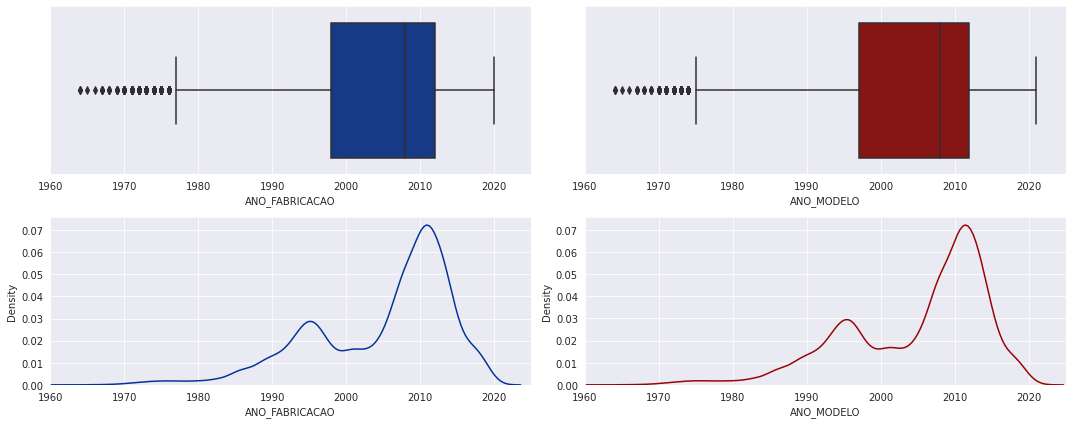

In [30]:
f = plt.figure(figsize=(15, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    ax.set(xlim=(1960, 2025))
    sns.boxplot(x=plot_fabricacao, color='#033399')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    ax.set(xlim=(1960, 2025))
    sns.boxplot(x=plot_modelo, color='#990303')


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    ax.set(xlim=(1960, 2025))
    sns.kdeplot(x=plot_fabricacao, ax=ax, color='#033399')

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    ax.set(xlim=(1960, 2025))
    sns.kdeplot(x=plot_modelo, ax=ax, color='#990303')

f.tight_layout()

## Ajuste do tipo das variáveis


Os campos `NUMERO`, `ANO_FABRICACAO`, `ANO_MODELO` e serão convertidos para inteiros,

*obs: os valores apresentados como NaN serão preenchidos com "0"*

In [31]:
#nos campos NUMERO, ANO_FABRICACAO e ANO_MODELO  os valores apresentados como NaN serão preenchidos com "0"
lista_int = ['NUMERO', 'ANO_FABRICACAO', 'ANO_MODELO']
for i in lista_int:
    dfsbc[i] = pd.to_numeric(dfsbc[i].replace(np.nan, 0), downcast='integer', errors='coerce')

<ipython-input-31-c4a6781daa71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsbc[i] = pd.to_numeric(dfsbc[i].replace(np.nan, 0), downcast='integer', errors='coerce')


In [32]:
dfsbc.dtypes

ANO_BO                       int64
NUM_BO                       int64
NUMERO_BOLETIM              object
BO_INICIADO                 object
BO_EMITIDO                  object
DATAOCORRENCIA              object
HORAOCORRENCIA              object
PERIDOOCORRENCIA            object
DATACOMUNICACAO             object
DATAELABORACAO              object
BO_AUTORIA                  object
FLAGRANTE                   object
NUMERO_BOLETIM_PRINCIPAL    object
LOGRADOURO                  object
NUMERO                       int32
BAIRRO                      object
CIDADE                      object
UF                          object
LATITUDE                    object
LONGITUDE                   object
DESCRICAOLOCAL              object
SOLUCAO                     object
DELEGACIA_NOME              object
DELEGACIA_CIRCUNSCRICAO     object
ESPECIE                     object
RUBRICA                     object
STATUS                      object
PLACA_VEICULO               object
UF_VEICULO          

## Salvar o arquivo em um novo arquivo *.csv*

In [33]:
dfsbc.to_csv('data_cleaned/furtos_veic_sbc.csv', index=False)